In [6]:
import matplotlib.pyplot as plt    
import pandas as pd    
import numpy as np       
def kernel(point,xmat, k):        
    m,n = np.shape(xmat)        
    weights = np.mat(np.eye((m))) # eye - identity matrix
    for j in range(m):            
        diff = point - xmat[j]            
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))         
    return weights 
def localWeight(point,xmat,ymat,k):        
     wei = kernel(point,xmat,k)        
     W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))        
     return W
def localWeightRegression(xmat,ymat,k):        
    m,n = np.shape(xmat)        
    ypred = np.zeros(m)        
    for i in range(m):            
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)        
    return ypred 
def graphPlot(X,ypred):            
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest  X = [[1. 16.01]] X[:,1] = [[16.01 ......]]
    #Sortindex contains the sorted index array which will be used for ypred array
    xsort = X[sortindex][:,0]
    print('first 3 elements of xsort')
    print(xsort[:3])
    fig = plt.figure()        
    plot = fig.add_subplot(1,1,1) # or 111 instead of 1,1,1 ; 111 = 1x1 grid and 1st plot        
    plot.scatter(bill,tip, color='green')        
    plot.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5)        
    plt.xlabel('Total bill') 
    plt.ylabel('Tip')        
    plt.show(); 
 # load data points
print('Main')
data = pd.read_csv('P10_data10_tips.csv')
print(data)

Main
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [7]:
bill = np.array(data.total_bill) # We use only Bill amount and Tips data
tip  = np.array(data.tip)        
mbill = np.mat(bill) # .mat will convert nd array is converted in 2D array    
mtip = np.mat(tip)    
m= np.shape(mbill)[1]
print(np.shape(mbill))

(1, 244)


In [8]:
one = np.mat(np.ones(m))    
X = np.hstack((one.T,mbill.T)) # 244 rows, 2 cols 
#X need transpose of the matrices of one and mbill to horizontally stack it
print(X[:4]) #first 4 elements

[[ 1.   16.99]
 [ 1.   10.34]
 [ 1.   21.01]
 [ 1.   23.68]]


first 3 elements of xsort
[[1.   3.07]
 [1.   5.75]
 [1.   7.25]]


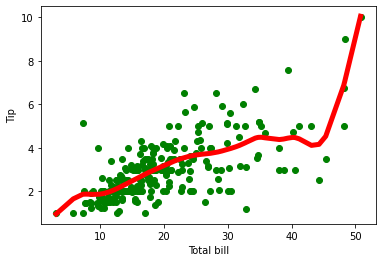

In [9]:
ypred = localWeightRegression(X,mtip,2) # increase k to get smooth curves    
graphPlot(X,ypred)